In [125]:
from jax import config

config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import os

os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".8"

In [126]:
import os
from copy import deepcopy
import pickle
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import h5py
from jax import jit, value_and_grad, vmap
import optax
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

from jax.scipy.signal import convolve2d
import jaxley as jx
from jaxley.channels import HH
#from jaxley.synapses import GlutamateSynapse

In [127]:
# Set these to change what cell you want
date = "2020-07-08"
stimulus = "noise_1500"
exp_num = "1"
cell_id = date + "_" + exp_num

# Get the home directory
home_directory = os.path.expanduser("~")

# Set the path to the data directory where results will be stored
base_dir = f'{home_directory}/GitRepos/jaxley_rgc/deistler_our_data_and_morph'
assert os.path.exists(base_dir), f'{base_dir} does not exist.'



In [128]:
all_dfs = pd.read_pickle(f"{base_dir}/results/data/setup.pkl")
cell_id = "2020-07-08_1"
cell = jx.read_swc(f"{base_dir}/morphologies/{cell_id}.swc", nseg=4, max_branch_len=300.0, min_radius=5.0)

soma_x = cell.xyzr[1][0,0]
soma_y = cell.xyzr[1][0,1]


/gpfs01/euler/User/ssuhai/GitRepos/jaxley/jaxley/utils/misc_utils.py:97: UserWarning: nseg is deprecated and will be removed in version 0.6.0.
  warnings.warn(msg + self._amend_msg)


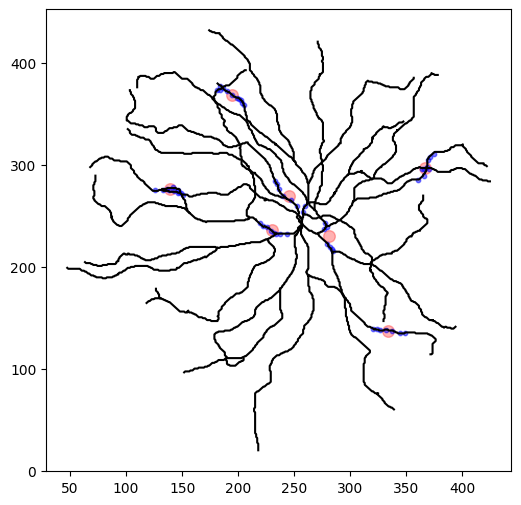

In [129]:
all_dfs.head()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = cell.vis(ax=ax)
for idx,(rec_id, rec_df) in enumerate (all_dfs.groupby('rec_id')):

    ax.scatter(rec_df['image_center_x'].iloc[0], rec_df['image_center_y'].iloc[0], s=70, marker='o', color='r',alpha=0.3)

    ax.scatter(rec_df['roi_x'], rec_df['roi_y'], s=10, marker='o', color='b',alpha=0.5)